In [1]:
#Load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.image as mpimg
from PIL import Image
from matplotlib import rcParams

### Import flow data 

In [3]:
# 2D pipe
data11 = np.loadtxt('2Dpipe/laminar/U',skiprows=4)
data1 =  np.loadtxt('2Dpipe/turbulent/koSST/U',skiprows=4)
data1a =  np.loadtxt('2Dpipe/turbulent/sparlatAlmers/U',skiprows=4)
data1b =  np.loadtxt('2Dpipe/turbulent/kklomega/U',skiprows=4)
data1c =  np.loadtxt('2Dpipe/turbulent/kepsilon/U',skiprows=4)
 
# 3D pipe
data33=  np.loadtxt('3Dpipe/laminar/U',skiprows=4)
data31 = np.loadtxt('3Dpipe/turbulent/koSST/U',skiprows=4)
data31a = np.loadtxt('3Dpipe/turbulent/sparlatAlmers/U',skiprows=4)
data31b = np.loadtxt('3Dpipe/turbulent/kklomega/U',skiprows=4)
data31c = np.loadtxt('3Dpipe/turbulent/kepsilon/U',skiprows=4)

## HomeWork - 3

# Report on modeling of turblent and laminar flows in 2D and 3D. 
### The case of pipe flow

###  1. Introducation 

In this homework simulations of a 2D and 3D pipe flows in a turbulent and laminar regimes were carried out. The characterstics Reynolds number were 10,000 and 100, respectively. In the turbulent case, two combinations of U (mean veocity) and $\nu $ (kinemantic visosity) were considered to obtain the same Reynolds number. Further, diffferernt turbulent models were used to examine the influence of turbulence model choice on simulation results. 


### 2. Methdology 

#### 2.1 Mesh generation 

The 2 and 3 dimensional pipes meshes are shown below. More refinement is applied to wall near cells to capture the effecet of viscousity. This was accomplised by using simplegradiging techniques and adding inflation layers. 

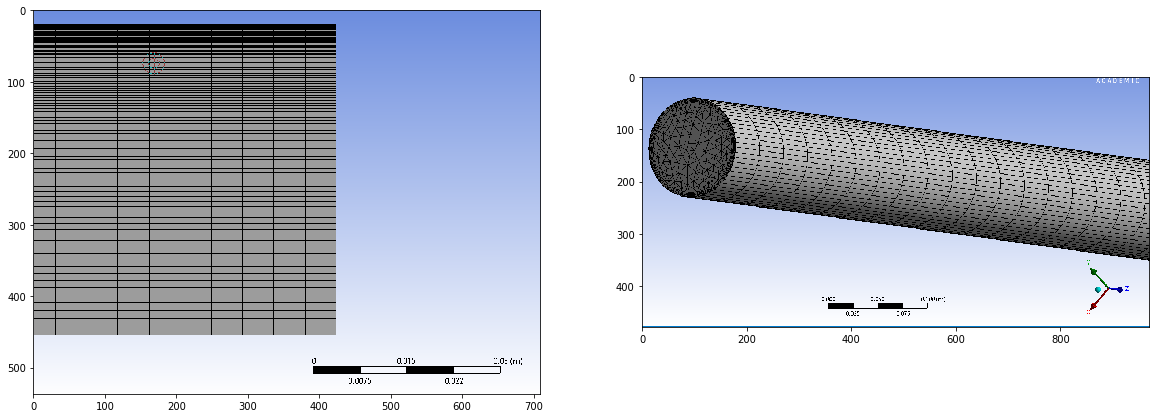

In [5]:
# figure size in inches optional
rcParams['figure.figsize'] = 20,10

# read images
img_A = mpimg.imread("2Dpipe/images/zoomed section mesh.png")
img_B = mpimg.imread("3Dpipe/images/Capture3.PNG")

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[1].imshow(img_B);

#### Figure1:  Left image is the 2D mesh as seen close to the outlet and right image is the 3D mesh as seen close to the outlet. 

####  2.2. Computation of turbulent parameters
The following values were used to computer the trubulence parameters for the turbulent flow. 


In [6]:
nu = 1e-05       # m^2/s
nu1= 1e-06       # m^2/s
nu2= 1e-03       # m^2/s
U = 1            # m/s
U1 = 0.1         # m/s
X  = 0.1         # Diameter of pipe [meters]
rho = 1          # kg/m^3
Re_char_turbulent = U*X/nu
Re_char_laminar   = U*X/nu2

# Turbulence intensity (I_t)  [-]
I = 0.16*Re_char_turbulent**(-1./8.)

print("Reynolds no. turbulent = ",Re_char_turbulent)
print("Reynolds no. laminar = ",Re_char_laminar)
print("Turbulence intensity = ",I)

Reynolds no. turbulent =  10000.0
Reynolds no. laminar =  100.0
Turbulence intensity =  0.05059644256269407


###  2.3. Model setup

- $low_Re {\kappa}{\omega}$SST, ${\kappa}-{\epsilon}$, ${\kappa}{\kappa}$SST and Sparlat Allmaras turbulent models were used for the turbulent cases. Validations were carried by plotting results agains the log low of turbulent. 


- In the laminar flow case, simulation results of velocity were compared to profiles obtained by Hagen-Poiseuille solution.

- For the laminar and turbuent cases default values of the realastion factors were used.

- Simple solver was used for coupling pressure and velocity.

- Scheme choices were, for grdient, least square methods, for pressure second order for momenturm second order upwind and turbuence viscosity second order upwind. 
- Standard initialization was used to set initial conditions. 

## 3. Model validation, Results and Discussion

Model was validated by comparing the velocity profile agains the log low of turbulence and by plots the velocity profile at the outlet agains a veocity profile obtained by the turbulent power low. 

### 3.1 Construct the velocity profile for the the Hagen-Poiseuille solution:
<font size="5"> $u = \frac{G}{4 \mu}\left (R^2 - r^2  \right)$ </font>
    
where R is radius of pipe, r  distance from the center along the pipe radius, $G = \frac {d P}{L} $ , L is the pipe length. 

### 3.2 Construct the velocity profile for the turbulent case following the turbulent power low:
<font size="5"> $U_{max} \times \left( 1 - \frac{r}{R}^{1/n}    \right)$ </font>

The the coeffcient of the power-law equation must be calibrated according to the Reynolds number.

#### Considering symmetry of flow along the pipe center, convert the 2D simulation data to a 3D.

#### Laminar flow Re= 100

In [7]:
#laminar 
b= len(data11)
data22= data11[1:b,:]
full2  = np.zeros((2*len(data11)-1, 2))
data_11= np.flip(data11,0)
full2[0:101,:]= data_11
data22[:,0]=data22[:,0]*-1
full2[101:202]= data22
Umax_laminar2D = max(full2[:,1])
Umax_laminar3D = max(data33[:,1])


#### Turbulent flow, Re = 10,000  $Low_{Re} - {\kappa}{\omega} SST $  model

In [8]:
#Turbulent

b= len(data1)
data2= data1[1:b,:]
full  = np.zeros((2*len(data1)-1, 2))
data_1= np.flip(data1,0)
full[0:101,:]= data_1
data2[:,0]=data2[:,0]*-1
full[101:202]= data2


In [9]:
#Find mid point of data and get maximum value of velocity U
data1=np.flip(full,0)
maxU2D=max(data1[:,1])
maxU3D=max(data31[:,1])
pos_maxU = np.where(data1[:,1] == max(data1[:,1]))
mid=pos_maxU[0][0]
print('Maximum velocity = ',maxU3D)
print('Array position of maximum velocity = ',mid)

Maximum velocity =  1.24239
Array position of maximum velocity =  100


In [10]:
q = 0.05               # mass flow rate in kg/s
R= 0.05
# r= full2[:,0]
r= np.linspace(-0.05,0.05,200)
nu = 0.001
rho = 1
mu = nu*rho 
Q = q/rho
G2D = Umax_laminar2D * 4* mu/ R**2
G3D = Umax_laminar3D * 4* mu/ R**2
u2D = (G2D/(4*mu))*(R**2 - r**2)
u3D = (G3D/(4*mu))*(R**2 - r**2)

#### Convert the 2d simulation to a 3d

In [11]:
u_p=np.linspace(0,0.05,100)
u_pp=maxU2D*(1-u_p/0.05)**(1./8.)

uppp  = np.zeros((100, 2))
uppp[:,0]  =u_p
uppp [:,1]=u_pp
data11=uppp
b= len(data11)
data22= data11[1:b,:]
full3  = np.zeros((2*len(data11)-1, 2))
data_11= np.flip(data11,0)
full3[0:100,:]= data_11
data22[:,0]=data22[:,0]*-1
full3[100:199]= data22


#### 3.1. Plot of laminar and turbulent physical velocity profiles. 


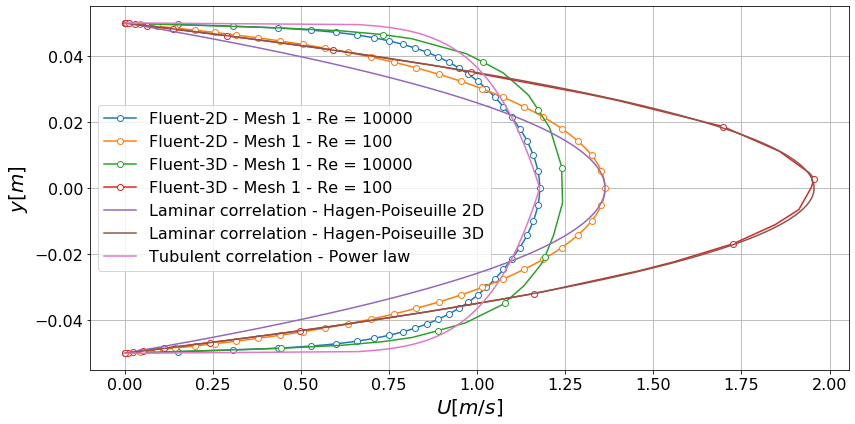

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(full[:,1],full[:,0],'o-',label='Fluent-2D - Mesh 1 - Re = 10000',markerfacecolor='white',markevery=4,zorder=10)
plt.plot(full2[:,1],full2[:,0],'o-',label='Fluent-2D - Mesh 1 - Re = 100',markerfacecolor='white',markevery=4,zorder=10)
plt.plot(data31[:,1],data31[:,0],'o-',label='Fluent-3D - Mesh 1 - Re = 10000',markerfacecolor='white',markevery=4,zorder=10)
plt.plot(data33[:,1],data33[:,0],'o-',label='Fluent-3D - Mesh 1 - Re = 100',markerfacecolor='white',markevery=4,zorder=10)

plt.plot(u2D,r,label='Laminar correlation - Hagen-Poiseuille 2D',zorder=10)
plt.plot(u3D,r,label='Laminar correlation - Hagen-Poiseuille 3D',zorder=10)
plt.plot (full3[:,1],full3[:,0],label= "Tubulent correlation - Power law",zorder=10)


plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$U  [m/s]$', fontsize=20)
plt.ylabel('$y [m]$', fontsize=20)

plt.tight_layout()



### 3.3  Plot non-dimensional velocity profile $y^+$ vs $u^+$



## Theoretical profiles
<br>
Log-law layer
<br>
<br>

<font size="5"> $u^+ = \frac{1}{\kappa} \text{ln} y^+ + C^+$ </font>

<br>
<br>

Viscous sublayer

<font size="5"> $u^+ =  y^+ $ </font>


In [13]:
#Compute theoretical profiles
x=np.linspace(0.1,100000,1000000)
yp=x

#Laminar sublayer
upl=yp

#Low-law layer
upt=(1.0/0.41)*np.log(yp)+5.0


#Compute therorical profiles with limit on values
x1=np.linspace(0.1,20,10000)
x2=np.linspace(5,100000,10000)

ypl1=x1
ypt1=x2

#Laminar sublayer
upl1=ypl1

#Low-law layer
upt1=(1.0/0.41)*np.log(ypt1)+5.0


## Spalding's law
<br>
The most widely known “universal” velocity profile is Spalding’s law [1], which is essentially a fit of the laminar, buffer and logarithmic regions of the boundary layer, 
<br>
<br>

<font size="5"> $y^+ = u^+ + \frac{1}{E} \left[e^{\kappa u^+} - 1 - \frac{\kappa u^+}{1!} - \frac{ \left( \kappa u^+ \right)^2}{2!} - \frac{ \left( \kappa u^+ \right)^3}{3!} - \frac{ \left( \kappa u^+ \right)^4}{4!} \right]$ </font>

<br>
<br>

[1] Spalding. A single formula for the law of the wall. J. of Applied Mechanics. 1961.

In [14]:
#Spalding universal law

up_s = np.linspace(0,30,10000)

#E = 9.025
#k = 0.4
#B = 5.5

E = 9.1
k = 0.42

#E = 8.6
#k = 0.417
    
yp_s = up_s + (1/E)*( np.exp(k*up_s) - 1 - (k*up_s) - ((k*up_s)**2)/2  - ((k*up_s)**3)/6 - ((k*up_s)**4)/24 )

In [15]:
#Compute y+ and u+ from numerical solution

U=1
U1=0.1
rho=1
nu=1.e-5
nu1=1.e-6

wallShearStress = np.loadtxt('2Dpipe/turbulent/koSST/wallShearStress',skiprows=4)
wallShearStress1 = np.loadtxt('2Dpipe/turbulent/sparlatAlmers/wallShearStress',skiprows=4)
wallShearStress2 = np.loadtxt('2Dpipe/turbulent/kklomega/wallShearStress',skiprows=4)
wallShearStress3 = np.loadtxt('2Dpipe/turbulent/Kepsilon/wallShearstress',skiprows=4)

ws =  max(wallShearStress[:,1])
ws1 = max(wallShearStress1[:,1])
ws2 = max(wallShearStress2[:,1])

mid = 17

utau = np.sqrt(ws/rho)
ypn = utau*(abs(data1[0:mid,0]- data1[0,0]))/nu
upn = data1[0:mid,1]/utau
  
data1az= np.flip(data1a,0)
     
utaus = np.sqrt(ws1/rho)
ypnas = utaus*(data1az[0,0]-abs(data1az[0:mid,0]))/nu1
upnas = data1az[0:mid,1]/utaus

data1bz= np.flip(data1b,0)
mid = 17
utaukkl = np.sqrt(ws2/rho)
ypnkkl = utaukkl*(data1bz[0,0]- abs(data1bz[0:mid,0]))/nu1
upnkkl = data1bz[0:mid,1]/utaukkl

data1cz= np.flip(data1c,0)
mid = 60
utauke = np.sqrt(ws3/rho)
ypnke = utauke*(data1cz[0,0]- abs(data1cz[0:mid,0]))/nu1
upnke = data1cz[0:mid,1]/utauke



NameError: name 'ws3' is not defined

In [16]:
#Compute y+ and u+ from numerical solution

wallShearStress = np.loadtxt('3Dpipe/turbulent/koSST/wallShearstress',skiprows=4)
wallShearStress1 = np.loadtxt('3Dpipe/turbulent/sparlatAlmers/wallShearstress',skiprows=4)
wallShearStress2 = np.loadtxt('3Dpipe/turbulent/kklomega/wallShearstress',skiprows=4)
wallShearStress3 = np.loadtxt('3Dpipe/turbulent/Kepsilon/wallShearstress',skiprows=4)

ws = max(wallShearStress[:,1])
ws1 = max(wallShearStress1[:,1])
ws2 = max(wallShearStress2[:,1])
ws3 = max(wallShearStress3[:,1])

mid = 17

utau1 = np.sqrt(ws/rho)
ypn1 = utau1*(data31[0,0]-abs(data31[0:mid,0]))/nu
upn1 = data31[0:mid,1]/utau1

utau1as = np.sqrt(ws1/rho)
ypn1as = utau1as*(data31a[0,0]-abs(data31a[0:mid,0]))/nu1
upn1as = data31a[0:mid,1]/utau1as

utau1kkl = np.sqrt(ws2/rho)
ypn1kkl = utau1kkl*(data31b[0,0] - abs(data31b[0:mid,0]))/nu1
upn1kkl = data31b[0:mid,1]/utau1kkl

utau1ke = np.sqrt(ws3/rho)
ypn1ke = utau1ke*(data31c[0,0] - abs(data31c[0:mid,0]))/nu1
upn1ke = data31c[0:mid,1]/utau1ke


##  Plot non-dimensional velocity profile $y^+$ vs $u^+$

### 2D pipe

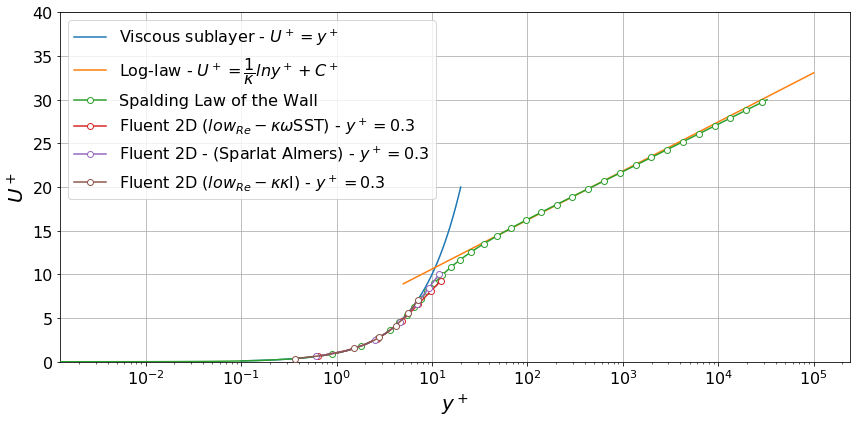

In [17]:
#Plot profiles

plt.figure(figsize=(12, 6))

#Correlations
#plt.plot(yp,upl,label='Viscous sublayer - $U^+=y^+$')
#plt.plot(yp,upt,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(ypl1,upl1,label='Viscous sublayer - $U^+=y^+$')
plt.plot(ypt1,upt1,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(yp_s,up_s,'o-',label='Spalding Law of the Wall',markerfacecolor='white',markevery=300,zorder=10)


#FLUENT solution
plt.plot(ypn[1:],upn[1:],'-o',ms=6,label='Fluent 2D ($low_{Re} - {\kappa}{\omega}$SST) - $y^+ = 0.3$',markerfacecolor='white',markevery=3,zorder=20)
plt.plot(ypnas[1:],upnas[1:],'-o',ms=6,label='Fluent 2D - (Sparlat Almers) - $y^+ = 0.3$',markerfacecolor='white',markevery=3,zorder=20)
plt.plot(ypnkkl[1:],upnkkl[1:],'-o',ms=6,label='Fluent 2D ($low_{Re} - {\kappa}{\kappa}$l) - $y^+ = 0.3$',markerfacecolor='white',markevery=3,zorder=20)



plt.xscale('log')
#plt.xlim(0,10000)
plt.ylim(0,40)

plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$y^+$', fontsize=20)
plt.ylabel('$U^+$', fontsize=20)

plt.tight_layout()

#plt.savefig("figbl.png")


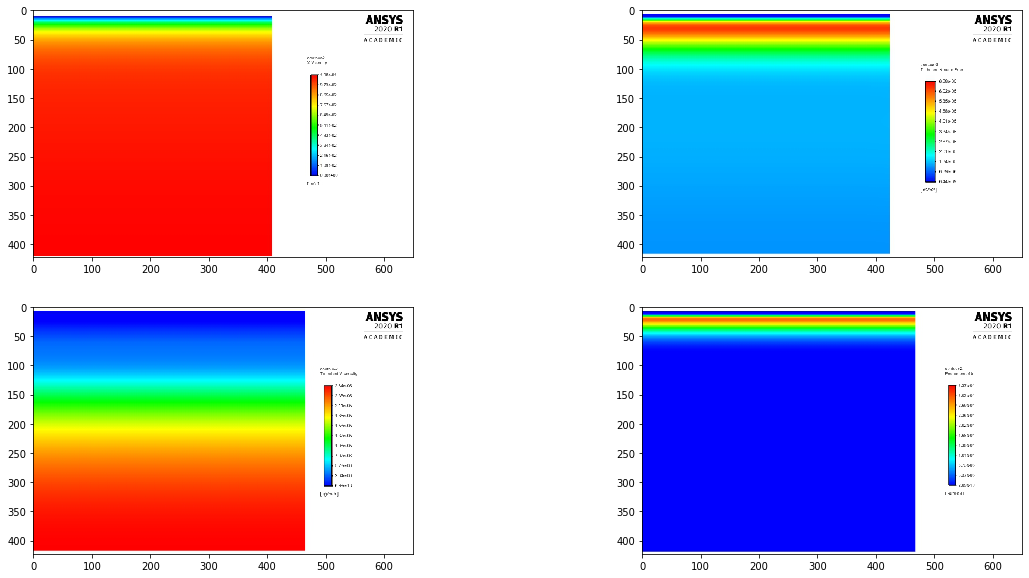

In [18]:
# figure size in inches optional
rcParams['figure.figsize'] = 20,10

# read images
img_A = mpimg.imread("2Dpipe/images/velocity2D.jpg")
img_B = mpimg.imread("2Dpipe/images/TKE.jpg")
img_C = mpimg.imread("2Dpipe/images/turbulenceViscosity.jpg")
img_D = mpimg.imread("2Dpipe/images/ProductionOfK.jpg")

# display images
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img_A);
ax[0,1].imshow(img_B);
ax[1,0].imshow(img_C);
ax[1,1].imshow(img_D);

#### Figure 2: top left: X- component velocity profile close to the outlet, top right is turbulent Kinentic energy (TKE), bottom left is the eddy viscosity and bottom right is the producation of TKE.

### 3D Pipe

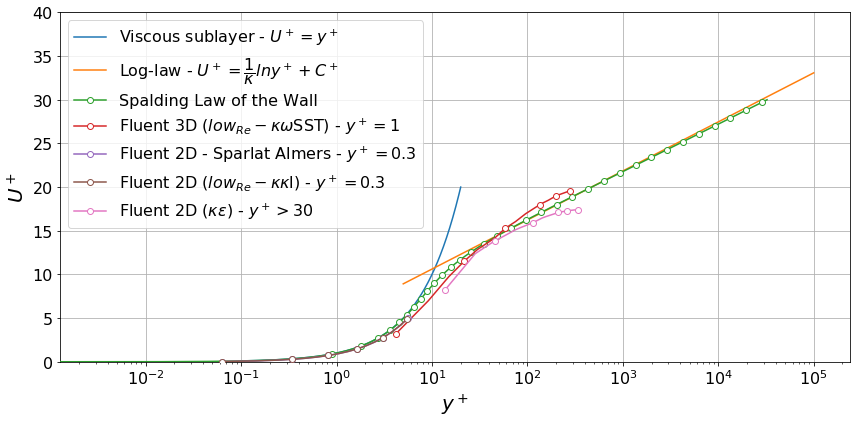

In [19]:
#Plot profiles

plt.figure(figsize=(12, 6))

#Correlations
#plt.plot(yp,upl,label='Viscous sublayer - $U^+=y^+$')
#plt.plot(yp,upt,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(ypl1,upl1,label='Viscous sublayer - $U^+=y^+$')
plt.plot(ypt1,upt1,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(yp_s,up_s,'o-',label='Spalding Law of the Wall',markerfacecolor='white',markevery=300,zorder=10)


#FLUENT solution
plt.plot(ypn1[1:],upn1[1:],'-o',ms=6,label='Fluent 3D ($low_{Re} - {\kappa}{\omega}$SST) - $y^+ = 1$',markerfacecolor='white',markevery=3,zorder=20)
plt.plot(ypn1as[1:],upn1as[1:],'-o',ms=6,label='Fluent 2D - Sparlat Almers - $y^+ = 0.3$',markerfacecolor='white',markevery=3,zorder=20)
plt.plot(ypn1kkl[1:],upn1kkl[1:],'-o',ms=6,label='Fluent 2D ($low_{Re} - {\kappa}{\kappa}$l) - $y^+ = 0.3$',markerfacecolor='white',markevery=3,zorder=20)
plt.plot(ypn1ke[1:],upn1ke[1:],'-o',ms=6,label='Fluent 2D (${\kappa}{\epsilon}$) - $y^+ > 30$',markerfacecolor='white',markevery=3,zorder=20)

plt.xscale('log')
#plt.xlim(0,10000)
plt.ylim(0,40)

plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$y^+$', fontsize=20)
plt.ylabel('$U^+$', fontsize=20)

plt.tight_layout()

#plt.savefig("figbl.png")

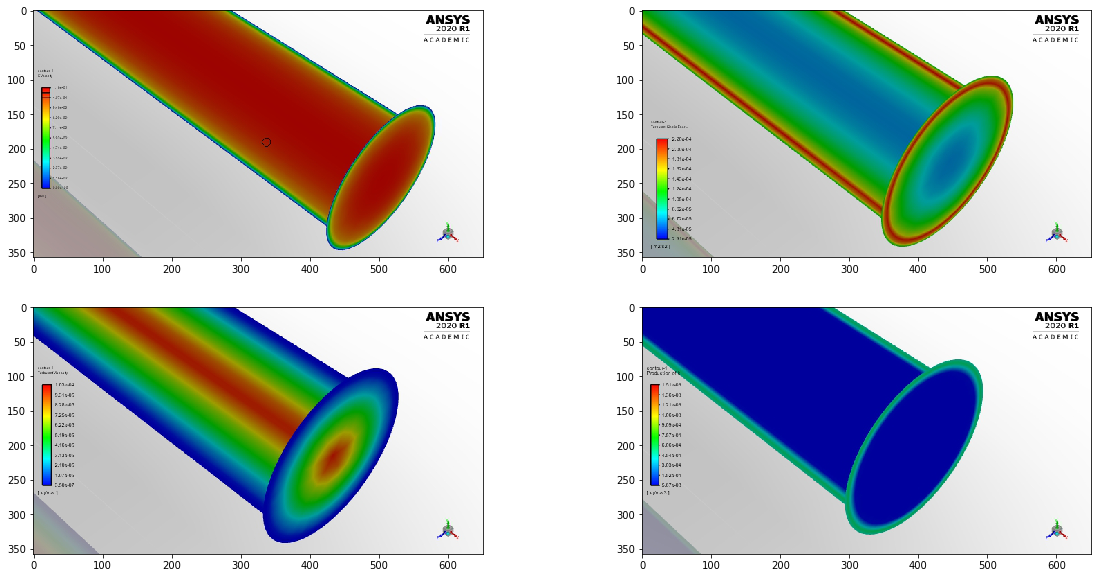

In [20]:
# figure size in inches optional
rcParams['figure.figsize'] = 20,10

# read images
img_A = mpimg.imread("3Dpipe/images/velocity.jpg")
img_B = mpimg.imread("3Dpipe/images/TKE.jpg")
img_C = mpimg.imread("3Dpipe/images/TurbulenViscosity.jpg")
img_D = mpimg.imread("3Dpipe/images/TurbulenDissipation.jpg")

# display images
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(img_A);
ax[0,1].imshow(img_B);
ax[1,0].imshow(img_C);
ax[1,1].imshow(img_D)

#### Figure 3: top left: X- component velocity profile close to the outlet, top right is turbulent Kinentic energy (TKE), bottom left is the eddy viscosity and bottom right is the disspiation of turbulence.

In [21]:
import sys
print('Python version:', sys.version_info)

import IPython
print('IPython version:', IPython.__version__)

import numpy
print('Numpy version', numpy.__version__)

import matplotlib
print('Matplotlib version:', matplotlib.__version__)


Python version: sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
IPython version: 7.12.0
Numpy version 1.18.1
Matplotlib version: 3.1.1
